## Part A

#### Importing Required Libraries

In [1370]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#### Importing Training Data

In [1371]:
train_df = pd.read_csv('CE802_P3_Data.csv')
train_data = train_df.copy()
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,271.78,-21.92,UK,-10.80,1899.57,17.98,-21749.82,91.94,855.61,10.01,...,2098.80,500.16,-6325.53,1.36,-33.14,177.34,-141.97,101.52,5,189.03
1,202.54,43.82,USA,-16.94,1941.57,-9.16,-27668.04,93.50,975.44,7.29,...,1668.70,434.97,-6172.05,2.59,-58.87,87.48,-154.11,623.22,6,187.17
2,220.26,88.90,Europe,-18.76,2298.12,-18.38,-11548.56,65.16,1114.28,12.05,...,2604.56,252.93,-10132.68,2.94,-40.89,271.00,-279.84,284.96,2,1016.24
3,141.00,140.72,Europe,-19.86,-133.32,-57.00,-16200.96,-14.00,910.12,4.54,...,2595.56,154.83,-7862.04,0.86,-117.03,201.66,-153.93,532.19,4,-141.18
4,165.04,2.74,Europe,-21.34,3077.07,-20.50,-25683.06,29.08,216.24,10.10,...,1066.80,316.68,-6093.81,3.59,-63.84,211.82,-182.34,373.14,5,33.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,136.78,-118.70,UK,-11.00,-2182.26,61.36,-28652.91,122.18,931.96,5.24,...,2027.26,217.35,-6333.81,2.70,-61.49,130.68,-170.57,320.11,2,794.82
1496,237.54,22.46,Europe,-14.26,3708.21,-13.08,-32394.33,128.58,405.60,10.36,...,971.88,486.51,-7549.68,5.53,-15.97,110.64,-163.60,472.43,6,2599.94
1497,144.24,7.18,USA,-19.48,3350.37,-42.80,-29448.90,35.42,253.94,9.34,...,2029.48,248.22,-6041.88,2.64,-33.76,143.46,-256.58,626.90,7,-171.98
1498,340.12,-72.58,Europe,-17.18,-244.83,178.16,-23377.80,178.96,683.61,8.55,...,1932.58,190.11,-8329.20,3.59,-107.77,150.18,-169.05,288.63,6,489.46


#### Data Preparation (Part One)

##### Checking Column Data Types

In [1372]:
train_data.dtypes

F1        float64
F2        float64
F3         object
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
F11        object
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17       float64
F18       float64
F19       float64
F20       float64
F21       float64
F22       float64
F23         int64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36         int64
Target    float64
dtype: object

##### Converting Categorical Values

Getting Information About Column 'F3'

In [1373]:
train_data['F3']

0           UK
1          USA
2       Europe
3       Europe
4       Europe
         ...  
1495        UK
1496    Europe
1497       USA
1498    Europe
1499    Europe
Name: F3, Length: 1500, dtype: object

Performing One-Hot Encoding

In [1374]:
train_data = pd.get_dummies(train_data, columns=['F3'])
train_data.loc[:, train_data.columns.str.startswith("F3_")]

,F3_Europe,F3_Rest,F3_UK,F3_USA
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1495,0,0,1,0
1496,1,0,0,0
1497,0,0,0,1
1498,1,0,0,0


Getting Information About Column 'F11'

In [1375]:
train_data['F11']

0        Very low
1          Medium
2          Medium
3             Low
4        Very low
          ...    
1495    Very high
1496       Medium
1497       Medium
1498          Low
1499    Very high
Name: F11, Length: 1500, dtype: object

Replacing Ordinal Data with Arbitrary Numbers

In [1376]:
cleanup = {"F11": {"Very low": 0, "Low" : 1, "Medium": 2, "High": 3, "Very high": 4}}
train_data.replace(cleanup, inplace=True)
train_data['F11']

0       0
1       2
2       2
3       1
4       0
       ..
1495    4
1496    2
1497    2
1498    1
1499    4
Name: F11, Length: 1500, dtype: int64

#### Training Data Pre-Processing

##### Missing Data

Checking for Missing Data

In [1377]:
train_data.isna().sum()

F1           0
F2           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
F31          0
F32          0
F33          0
F34          0
F35          0
F36          0
Target       0
F3_Europe    0
F3_Rest      0
F3_UK        0
F3_USA       0
dtype: int64

No Missing Data

#### Data Visualization

##### Checking for False Predictors

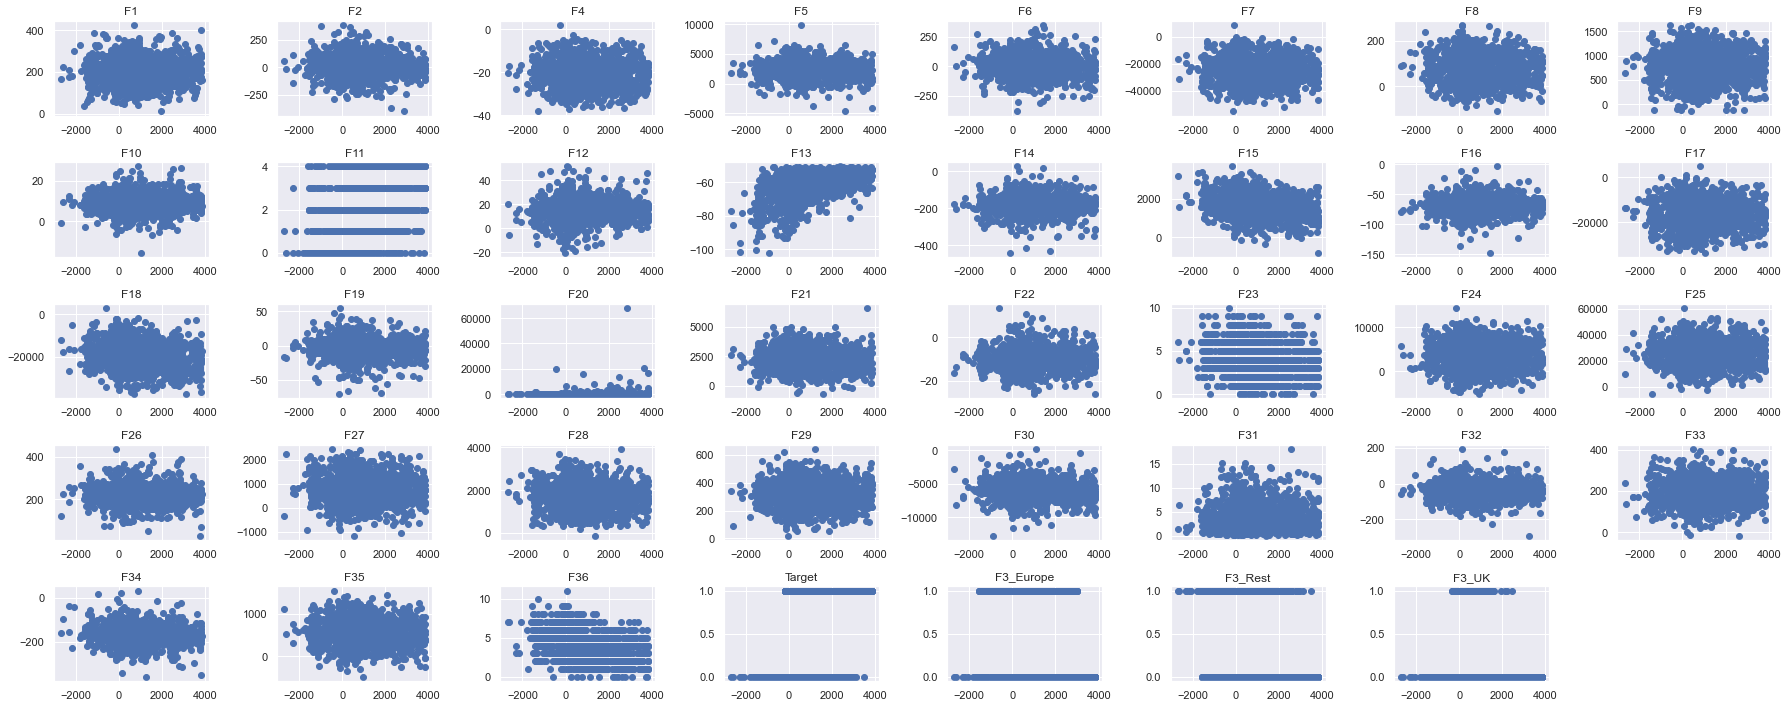

In [1378]:
x = train_data.loc[:, train_data.columns != 'Target'].to_numpy()
y = train_data.loc[:, 'Target'].to_numpy()
plt.figure(figsize=(25, 10))
for i in range(x.shape[1]):
    plt.subplot(5, 8, i+1)
    plt.scatter(y,x[:,i])
    plt.title(train_data.columns[i])
plt.tight_layout()
plt.show()

No Obvious False Predictors Found

##### Checking Feature Correlation

F1           0.010754
F2          -0.056762
F4           0.006143
F5          -0.025662
F6          -0.041725
F7          -0.017988
F8          -0.052481
F9           0.001310
F10          0.043625
F11          0.301984
F12          0.048893
F13          0.463560
F14         -0.019449
F15         -0.293027
F16          0.015091
F17         -0.001184
F18         -0.211590
F19         -0.050519
F20          0.106413
F21         -0.022837
F22          0.021697
F23         -0.135855
F24         -0.015650
F25          0.004574
F26         -0.033530
F27          0.003702
F28         -0.085837
F29          0.018111
F30         -0.054768
F31          0.007440
F32         -0.023321
F33          0.036877
F34         -0.082510
F35         -0.078041
F36         -0.330411
Target       1.000000
F3_Europe    0.290149
F3_Rest     -0.011240
F3_UK       -0.095913
F3_USA      -0.186233
Name: Target, dtype: float64

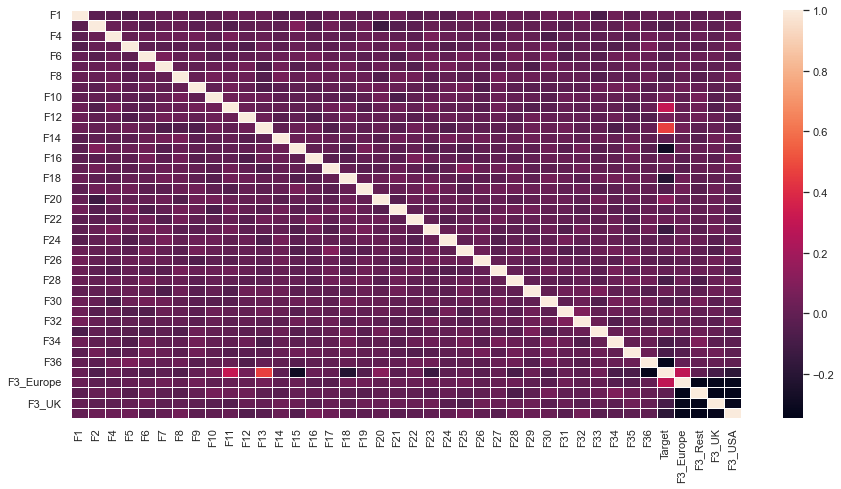

In [1379]:
sns.set(rc = {'figure.figsize':(15,7.5)})
sns.heatmap(train_data.corr(), linewidth=0.5)
train_data[train_data.columns[:]].corr()['Target'][:]

Column 'F13' Appears to Have a Fairly Strong Correlation to the 'Target' Column

Columns With Prefix 'F3_' Also Have a Noticeable Negative Correlation to the 'Target' Column

#### Data Preparation (Part Two)

##### Separating Target Column

In [1380]:
x = train_data.loc[:, train_data.columns != 'Target'].to_numpy()
y = train_data.loc[:, 'Target'].to_numpy()

##### Data Partioning

In [1381]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

##### Feature Selection

Feature 0: 0.004245
Feature 1: 0.014810
Feature 2: 0.006248
Feature 3: 0.002416
Feature 4: 0.000000
Feature 5: 0.011113
Feature 6: 0.061816
Feature 7: 0.014439
Feature 8: 0.003050
Feature 9: 0.049909
Feature 10: 0.000000
Feature 11: 0.161140
Feature 12: 0.006624
Feature 13: 0.075611
Feature 14: 0.000000
Feature 15: 0.001439
Feature 16: 0.030799
Feature 17: 0.020329
Feature 18: 0.076488
Feature 19: 0.013036
Feature 20: 0.000000
Feature 21: 0.018134
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 0.021499
Feature 25: 0.012589
Feature 26: 0.011135
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.007162
Feature 30: 0.022285
Feature 31: 0.000000
Feature 32: 0.077985
Feature 33: 0.000000
Feature 34: 0.069432
Feature 35: 0.136763
Feature 36: 0.120275
Feature 37: 0.058103
Feature 38: 0.136744


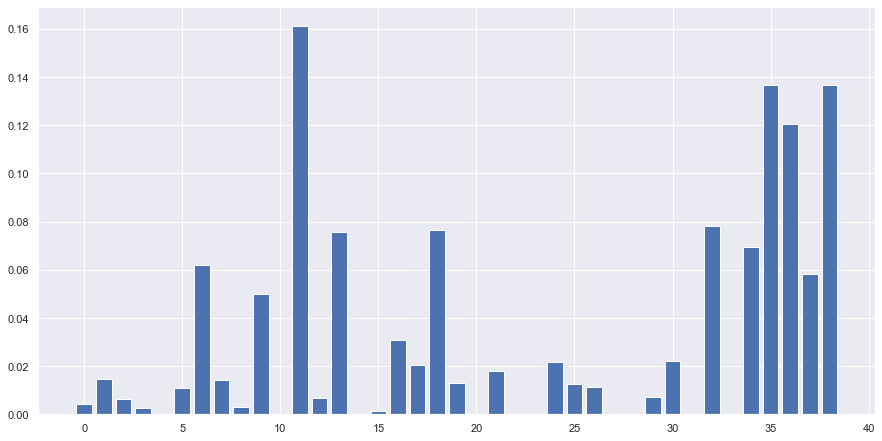

In [1382]:
selected_features = SelectKBest(score_func=mutual_info_regression, k='all')
selected_features.fit(x_train, y_train)

for i in range(len(selected_features.scores_)):
	print('Feature %d: %f' % (i, selected_features.scores_[i]))
plt.bar([i for i in range(len(selected_features.scores_))], selected_features.scores_)
plt.show()

In [1383]:
selected_features = SelectKBest(score_func=f_regression, k=22)
selected_features.fit(x_train, y_train)

x_train = selected_features.transform(x_train)
x_test = selected_features.transform(x_test)

#### Creating Lists for Model Comparison

In [1384]:
models = []
model_train_accuracies = []
model_train_root_mean_squared_errors = []
model_test_accuracies = []
model_test_root_mean_squared_errors = []

#### Experimenting with Classifiers

##### Linear Regression Regressor

In [1385]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_pipe = Pipeline(steps=[('scaler', sc), ('regressor', lr_model)])
lr_param_grid = {
    'scaler__with_std': [True, False],
    'regressor__normalize': [True, False],
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
}
lr_model = GridSearchCV(lr_pipe, lr_param_grid, cv=10, verbose=1, n_jobs=-1)
lr_model.fit(x_train, y_train)
print(lr_model.best_params_)

lr_train = lr_model.predict(x_train)
lr_train_accuracy = r2_score(y_train, lr_train)
print("Train Accuracy Score: ", lr_train_accuracy)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train))
print("Train RMSE score: ", lr_train_rmse)

lr_test = lr_model.predict(x_test)
lr_test_accuracy = r2_score(y_test, lr_test)
print("Test Accuracy Score: ", lr_test_accuracy)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test))
print("Test RMSE score: ", lr_test_rmse)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
{'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__normalize': True, 'scaler__with_std': True}
Train Accuracy Score:  0.709662474520427
Train RMSE score:  661.5995725212177
Test Accuracy Score:  0.6817048083892372
Test RMSE score:  679.5647934787628


Saving Score and Model

In [1386]:
models.append('lr_model')
model_train_accuracies.append(lr_train_accuracy)
model_test_accuracies.append(lr_test_accuracy)
model_train_root_mean_squared_errors.append(lr_train_rmse)
model_test_root_mean_squared_errors.append(lr_test_rmse)
pickle.dump(lr_model, open("lr_regressor_model.p", "wb"))

##### SVM Regressor

In [1387]:
from sklearn.svm import SVR

svm_model = SVR()
svm_pipe = Pipeline(steps=[('scaler', sc), ('regressor', svm_model)])
svm_param_grid = {
    "scaler__with_std" : [True, False],
    "regressor__C" : [0.1, 1, 10, 100, 1000],
    "regressor__gamma" : [1, 0.1, 0.01, 0.001, 0.0001]
}
svm_model = GridSearchCV(svm_pipe, svm_param_grid, cv=10, verbose=1, n_jobs=-1)
svm_model.fit(x_train, y_train)
print(svm_model.best_params_)

svm_train = svm_model.predict(x_train)
svm_train_accuracy = r2_score(y_train, svm_train)
print("Train Accuracy Score: ", svm_train_accuracy)
svm_train_rmse = np.sqrt(mean_squared_error(y_train, svm_train))
print("Train RMSE score: ", svm_train_rmse)

svm_test = svm_model.predict(x_test)
svm_test_accuracy = r2_score(y_test, svm_test)
print("Test Accuracy Score: ", svm_test_accuracy)
svm_test_rmse = np.sqrt(mean_squared_error(y_test, svm_test))
print("Test RMSE score: ", svm_test_rmse)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'regressor__C': 1000, 'regressor__gamma': 0.01, 'scaler__with_std': True}
Train Accuracy Score:  0.7690965654836243
Train RMSE score:  590.0092586259825
Test Accuracy Score:  0.7224162467166781
Test RMSE score:  634.6186837411266


Saving Score and Model

In [1388]:
models.append('svm_model')
model_train_accuracies.append(svm_train_accuracy)
model_test_accuracies.append(svm_test_accuracy)
model_train_root_mean_squared_errors.append(svm_train_rmse)
model_test_root_mean_squared_errors.append(svm_test_rmse)
pickle.dump(svm_model, open("svm_regressor_model.p", "wb"))

##### Lasso Regressor

In [1389]:
from sklearn.linear_model import Lasso

la_model = Lasso()
la_pipe = Pipeline(steps=[('scaler', sc), ('regressor', la_model)])
la_param_grid = {
    "scaler__with_std" : [True, False],
    "regressor__alpha" : np.arange(0, 1, 0.1)
}
la_model = GridSearchCV(la_pipe, la_param_grid, cv=10, verbose=1, n_jobs=-1)
la_model.fit(x_train, y_train)
print(la_model.best_params_)

la_train = la_model.predict(x_train)
la_train_accuracy = r2_score(y_train, la_train)
print("Train Accuracy Score: ", la_train_accuracy)
la_train_rmse = np.sqrt(mean_squared_error(y_train, la_train))
print("Train RMSE score: ", la_train_rmse)

la_test = la_model.predict(x_test)
la_test_accuracy = r2_score(y_test, la_test)
print("Test Accuracy Score: ", la_test_accuracy)
la_test_rmse = np.sqrt(mean_squared_error(y_test, la_test))
print("Test RMSE score: ", la_test_rmse)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'regressor__alpha': 0.9, 'scaler__with_std': True}
Train Accuracy Score:  0.7096512090041631
Train RMSE score:  661.6124079072641
Test Accuracy Score:  0.6815423048023438
Test RMSE score:  679.7382450858264


Saving Score and Model

In [1390]:
models.append('la_model')
model_train_accuracies.append(la_train_accuracy)
model_test_accuracies.append(la_test_accuracy)
model_train_root_mean_squared_errors.append(la_train_rmse)
model_test_root_mean_squared_errors.append(la_test_rmse)
pickle.dump(la_model, open("la_regressor_model.p", "wb"))

##### SGD Regressor

In [1391]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_pipe = Pipeline(steps=[('scaler', sc), ('regressor', sgd_model)])
sgd_param_grid = {
    "scaler__with_std" : [True, False],
    'regressor__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling'],
}
sgd_model = GridSearchCV(sgd_pipe, sgd_param_grid, cv=10, verbose=1, n_jobs=-1)
sgd_model.fit(x_train, y_train)
print(sgd_model.best_params_)

sgd_train = sgd_model.predict(x_train)
sgd_train_accuracy = r2_score(y_train, sgd_train)
print("Train Accuracy Score: ", sgd_train_accuracy)
sgd_train_rmse = np.sqrt(mean_squared_error(y_train, sgd_train))
print("Train RMSE score: ", sgd_train_rmse)

sgd_test = sgd_model.predict(x_test)
sgd_test_accuracy = r2_score(y_test, sgd_test)
print("Test Accuracy Score: ", sgd_test_accuracy)
sgd_test_rmse = np.sqrt(mean_squared_error(y_test, sgd_test))
print("Test RMSE score: ", sgd_test_rmse)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
{'regressor__alpha': 1e-05, 'regressor__learning_rate': 'invscaling', 'regressor__loss': 'squared_loss', 'regressor__penalty': 'l2', 'scaler__with_std': True}
Train Accuracy Score:  0.7081747789348345
Train RMSE score:  663.292431791088
Test Accuracy Score:  0.6739635185255066
Test RMSE score:  687.7790310657771


Saving Score and Model

In [1392]:
models.append('sgd_model')
model_train_accuracies.append(sgd_train_accuracy)
model_test_accuracies.append(sgd_test_accuracy)
model_train_root_mean_squared_errors.append(sgd_train_rmse)
model_test_root_mean_squared_errors.append(sgd_test_rmse)
pickle.dump(sgd_model, open("sgd_regressor_model.p", "wb"))

#### Comparison

In [1393]:
model_comparison = pd.DataFrame()
model_comparison['Model'] = models
model_comparison['Train Accuracy'] = model_train_accuracies
model_comparison['Train RMSE'] = model_train_root_mean_squared_errors
model_comparison['Test Accuracy'] = model_test_accuracies
model_comparison['Test RMSE'] = model_test_root_mean_squared_errors
model_comparison

,Model,Train Accuracy,Train RMSE,Test Accuracy,Test RMSE
0,lr_model,0.709662,661.599573,0.681705,679.564793
1,svm_model,0.769097,590.009259,0.722416,634.618684
2,la_model,0.709651,661.612408,0.681542,679.738245
3,sgd_model,0.708175,663.292432,0.673964,687.779031


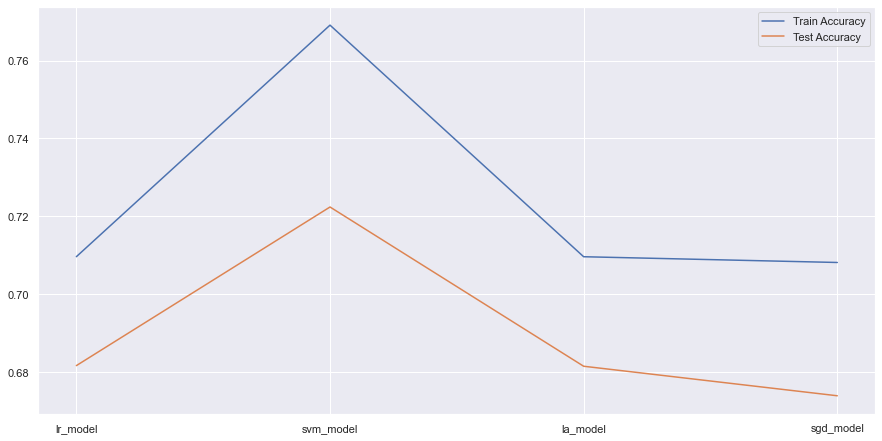

In [1394]:
plt.plot(model_comparison['Model'], model_comparison['Train Accuracy'], label = "Train Accuracy")
plt.plot(model_comparison['Model'], model_comparison['Test Accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

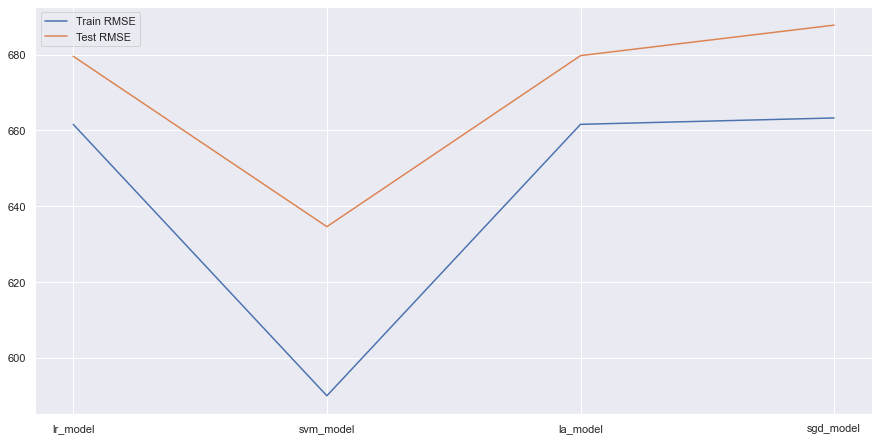

In [1395]:
plt.plot(model_comparison['Model'], model_comparison['Train RMSE'], label = "Train RMSE")
plt.plot(model_comparison['Model'], model_comparison['Test RMSE'], label = "Test RMSE")
plt.legend()
plt.show()

#### Selecting a Model

In [1404]:
# model = pickle.load(open("svm_regressor_model.p", "rb"))
model = svm_model    # using this as extra files are not allowed in the moodle submission

## Part B

#### Importing Testing Data

In [1405]:
test_df = pd.read_csv('CE802_P3_Test.csv')
test_data = test_df.iloc[:,:-1].copy()
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,293.42,126.36,Europe,-23.90,3012.33,-196.64,-15368.82,112.52,1029.51,9.40,...,1101.42,1113.48,358.83,-8406.72,2.52,-94.58,214.96,-191.24,875.31,7
1,242.26,49.12,Rest,-17.56,2485.47,5.10,-38092.89,25.94,522.92,11.82,...,739.58,1336.84,95.70,-6739.56,5.46,-20.49,122.34,-165.19,778.98,5
2,130.54,62.32,Rest,-27.34,1973.40,1.98,-21792.75,89.28,551.56,12.51,...,113.28,2011.40,336.66,-5784.03,5.18,-33.16,257.62,-165.89,688.42,4
3,171.62,144.70,Rest,-20.70,2167.92,-20.82,-10528.14,91.22,1207.56,12.88,...,1289.56,2534.52,282.03,-6799.92,0.60,-25.08,190.10,-74.90,1075.49,2
4,155.78,-202.92,Rest,-24.86,2657.28,17.24,-23577.09,75.84,425.77,6.35,...,22.98,2788.68,337.71,-5896.68,1.87,14.65,188.12,-202.21,575.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,283.66,20.72,USA,-24.14,2058.24,96.78,-39055.41,159.54,1122.08,11.89,...,916.24,2087.92,193.35,-6083.94,8.77,-12.14,155.32,-150.34,576.03,3
1496,185.44,-15.20,Rest,-19.70,2029.80,127.30,-31133.58,58.56,658.80,7.22,...,624.70,1649.20,345.66,-6640.68,4.77,-2.77,147.52,-202.54,518.00,6
1497,134.28,35.72,UK,-19.58,1999.17,-6.58,-9067.11,51.84,1211.30,8.34,...,1936.60,1337.98,261.87,-6276.60,4.21,-15.89,173.84,-146.91,1289.64,4
1498,211.72,20.28,Europe,-18.54,1786.62,-42.66,-13774.95,72.30,439.74,4.75,...,237.94,2017.32,342.06,-5753.85,4.60,81.44,234.02,-153.12,637.53,6


#### Data Preparation (Part One)

In [1406]:
test_data = pd.get_dummies(test_data, columns=['F3'])
test_data.loc[:, test_data.columns.str.startswith("F3_")]

,F3_Europe,F3_Rest,F3_UK,F3_USA
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1495,0,0,0,1
1496,0,1,0,0
1497,0,0,1,0
1498,1,0,0,0


In [1407]:
test_data.replace(cleanup, inplace=True)
test_data['F11']

0       2
1       4
2       1
3       3
4       4
       ..
1495    0
1496    1
1497    3
1498    0
1499    3
Name: F11, Length: 1500, dtype: int64

#### Testing Data Pre-Processing

##### Missing Data

Checking for Missing Data

In [1408]:
test_data.isna().sum()

F1           0
F2           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
F31          0
F32          0
F33          0
F34          0
F35          0
F36          0
F3_Europe    0
F3_Rest      0
F3_UK        0
F3_USA       0
dtype: int64

No Missing Data

#### Data Preparation (Part Two)

##### Feature Selection

In [1409]:
test_data = selected_features.transform(test_data)

#### Making Predictions

In [1410]:
predicted = model.predict(test_data)
test_df.iloc[:,-1] = predicted

#### Saving Predictions

In [1411]:
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])